# Projet de reconnaissances d'images de manga

Ce projet s'intéresse à la reconnaissance d'images de mangas. Nous en avons **4** : Black Clover, Shnigeki No Kyojin, Détective Conan et Naruto respectivement abrégés bc, shingeki, conan et naruto.

A partir d'une image donnée, le but sera donc de savoir de quel manga elle provient. L'arborescence du projet est la suivante : nous disposons de 3 dossiers test, train et validation qui contiennent à leur tour un dossier par classe qui contiennent les images. 

Import des fichiers et installation de efficientnet

In [86]:
!git clone https://github.com/mombad/DeepLearning.git
!pip install efficientnet
path = "./DeepLearning/"
pathUrlBc = "./DeepLearning/urls/urls-bc.txt"
pathUrlSnk = "./DeepLearning/urls/urls-aot.txt"
pathUrlConan = "./DeepLearning/urls/urls-conan.txt"
pathUrlNaruto = "./DeepLearning/urls/urls-naruto.txt"

     |████████████████████████████████| 51kB 8.2MB/s 


Traitement des images provenant des urls

In [31]:
o = open(pathUrlBc,"r")
url0 = o.read()
o.close()

o1 = open(pathUrlSnk,"r")
url1 = o1.read()
o1.close()

o2 = open(pathUrlConan,"r")
url2 = o2.read()
o2.close()

o3 = open(pathUrlNaruto,"r")
url3 = o3.read()
o3.close()

## list, containing downloaded files 
urlsBc = url0.split()
urlsAot = url1.split()
urlsConan = url2.split()
urlsNaruto = url3.split()

In [32]:
#Téléchargement d'images par les Url
#Temps d'exécution ~~ 15-17 min
import requests,os

loc_dataBc = "./DeepLearning/train/bc/"
loc_dataSnk = "./DeepLearning/train/shingeki/"
loc_dataConan = "./DeepLearning/train/conan/"
loc_dataNaruto = "./DeepLearning/train/naruto/"
try:
    os.makedirs(loc_data)
except:
    pass
iimage = 0
for url in urlsBc:
    try:
        f = open(loc_dataBc + 'image{:05.0f}.jpg'.format(iimage+99),'wb')
        f.write(requests.get(url).content)
        f.close()
        iimage += 1
    except Exception as e:
        print("\n{} {}".format(e,url))
        pass

for url in urlsAot:
    try:
        f = open(loc_dataSnk + 'image{:05.0f}.jpg'.format(iimage+99),'wb')
        f.write(requests.get(url).content)
        f.close()
        iimage += 1
    except Exception as e:
        print("\n{} {}".format(e,url))
        pass

for url in urlsConan:
    try:
        f = open(loc_dataConan + 'image{:05.0f}.jpg'.format(iimage+99),'wb')
        f.write(requests.get(url).content)
        f.close()
        iimage += 1
    except Exception as e:
        print("\n{} {}".format(e,url))
        pass

for url in urlsNaruto:
    try:
        f = open(loc_dataNaruto + 'image{:05.0f}.jpg'.format(iimage+99),'wb')
        f.write(requests.get(url).content)
        f.close()
        iimage += 1
    except Exception as e:
        print("\n{} {}".format(e,url))
        pass


HTTPSConnectionPool(host='file-image.mpcdn.net', port=443): Max retries exceeded with url: /17/645/2.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f3ef2581390>: Failed to establish a new connection: [Errno -2] Name or service not known')) https://file-image.mpcdn.net/17/645/2.jpg

HTTPSConnectionPool(host='www.mangas-partage.fr', port=443): Max retries exceeded with url: /uploads/manga/naruto/chapters/tome%2015/21.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f3ef2581b50>: Failed to establish a new connection: [Errno -2] Name or service not known')) https://www.mangas-partage.fr/uploads/manga/naruto/chapters/tome%2015/21.jpg

HTTPSConnectionPool(host='www.mangas-partage.fr', port=443): Max retries exceeded with url: /uploads/manga/naruto/chapters/tome%2019/39.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f3ef2671990>: Failed to establish a new conne

Une fois les données téléchargées localement, on peut maintenant charger les images et les labels.

In [34]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat
import pandas as pd 


def load_data(data_path, classes, dataset='train', image_size=128):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
     
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            try:
              item = dirs[idx_img]
              if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                  # Ouverture de l'image
                  img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                  # Conversion de l'image en RGB
                  img = img.convert('RGB')
                  # Redimensionnement de l'image et écriture dans la variable de retour x 
                  img = img.resize((image_size,image_size))
                  x[current_index] = np.asarray(img)
                  # Écriture du label associé dans la variable de retour y
                  y[current_index] = idx_class
                  current_index += 1
            except Exception as e:
                print("\n{} {}".format(e,url))
                pass
                
                
    return x, y

Chargement des données

In [87]:
labels = ['bc', 'shingeki', 'conan', 'naruto']
#labels = ['bc', 'shingeki']

x_train, y_train = load_data(path, labels, dataset='train', image_size=128)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=128)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=128)
print(x_test.shape, y_test.shape)


cannot identify image file './DeepLearning/train/bc/image00106.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00107.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00116.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00121.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00137.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))



cannot identify image file './DeepLearning/train/bc/image00160.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00162.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00171.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00184.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00212.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00215.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/bc/image00238.jpg' https://mangaclover.files

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



cannot identify image file './DeepLearning/train/bc/image00353.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/shingeki/image00534.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/shingeki/image00551.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/shingeki/image00584.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/shingeki/image00620.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/shingeki/image00622.jpg' https://mangaclover.files.wordpress.com/2013/12/naruto-638-manga-page-5.jpg?w=584

cannot identify image file './DeepLearning/train/shingeki/image

Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

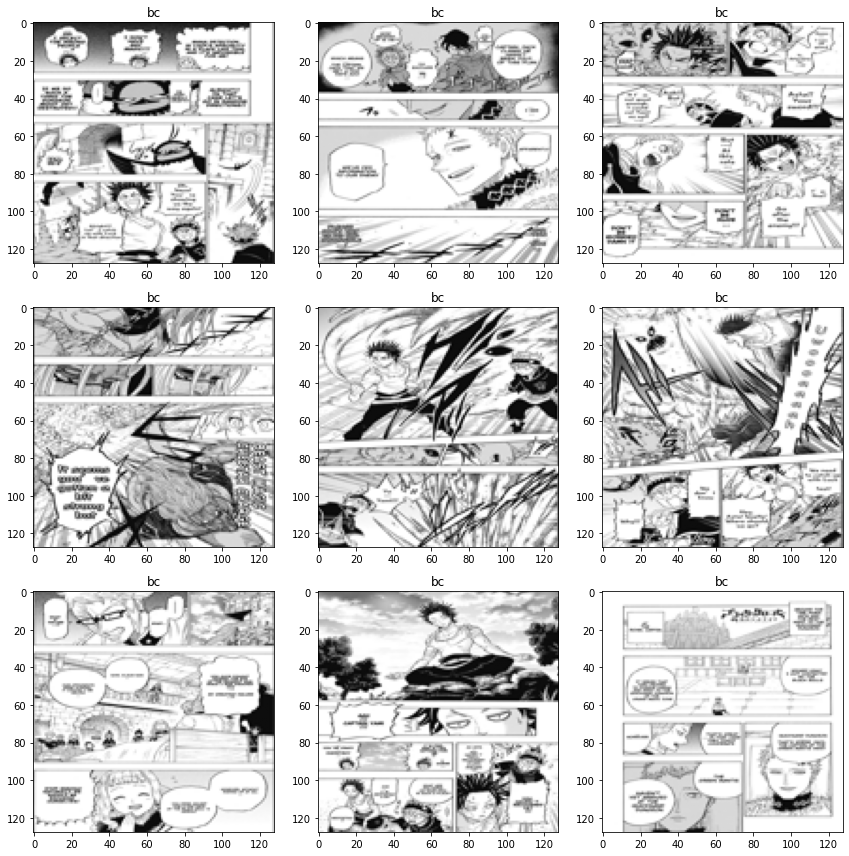

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255,cmap='gray')

plt.tight_layout()
plt.show()

In [89]:
#Imports
from tensorflow.python.client import device_lib
import keras
from keras import layers, models, optimizers, regularizers, applications
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
import pandas as pd
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt


from efficientnet.keras import EfficientNetB3
from keras.models import Sequential



Modification de la représentation des labels

In [90]:
x_train.shape, y_train.shape
y_trainBis = np.zeros((y_train.shape[0], 4))
y_valBis = np.zeros((245, 4))
for i in range(y_train.shape[0]) :
  if(y_train[i][0] == 0.0):
    y_trainBis[i] = [1,0,0,0]
  elif(y_train[i][0] == 1.0):
    y_trainBis[i] = [0,1,0,0]
  elif(y_train[i][0] == 2.0):
    y_trainBis[i] = [0,0,1,0]
  else :
    y_trainBis[i] = [0,0,0,1]

y_train = y_trainBis

for i in range(245) :
  if(y_val[i][0] == 0.0):
    y_valBis[i] = [1,0,0,0]
  elif(y_val[i][0] == 1.0):
    y_valBis[i] = [0,1,0,0]
  elif(y_val[i][0] == 2.0):
    y_valBis[i] = [0,0,1,0]
  else :
    y_valBis[i] = [0,0,0,1]

y_val = y_valBis




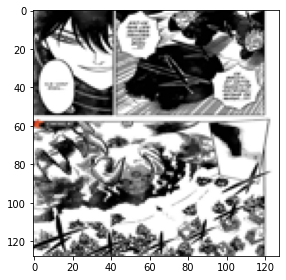

In [91]:
image = x_train[200]


plt.imshow(image/255,cmap='gray')
plt.tight_layout()
plt.show()

Définition du modèle

In [92]:
model = models.Sequential()

"""
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3), kernel_regularizer=regularizers.l2(0.02)))
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Conv2D(96, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(MaxPooling2D(pool_size=(2,2)))

"""

efficient_net = EfficientNetB3(
    weights='imagenet',
    input_shape=(128,128,3),
    include_top=False,
    pooling='max',
    drop_connect_rate=0.4
)

model.add(efficient_net)


model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model.add(Dense(512, activation='relu', bias_regularizer=keras.regularizers.l1(l=0.01)))   # Couche dense, à 512 neurones
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))   # Couche de sortie


44113920/44107200 [==============================] - 0s 0us/step


In [93]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Functional) (None, 1536)              10783528  
_________________________________________________________________
flatten_9 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               786944    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 2052      
Total params: 11,572,524
Trainable params: 11,485,228
Non-trainable params: 87,296
_________________________________________________________________


Compilation

In [94]:
#model.compile(loss='mse',
#              optimizer=optimizers.Adam(lr=3e-4),
#              metrics=['acc'])

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['accuracy'])




Exécution

In [95]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
60/60 [==============================] - 28s 250ms/step - loss: 2.0837 - accuracy: 0.3790 - val_loss: 1.8857 - val_accuracy: 0.1918
Epoch 2/10
60/60 [==============================] - 11s 188ms/step - loss: 1.0894 - accuracy: 0.5679 - val_loss: 1.1632 - val_accuracy: 0.5265
Epoch 3/10
60/60 [==============================] - 11s 190ms/step - loss: 0.8139 - accuracy: 0.6859 - val_loss: 0.3947 - val_accuracy: 0.8612
Epoch 4/10
60/60 [==============================] - 11s 191ms/step - loss: 0.6557 - accuracy: 0.7620 - val_loss: 0.3431 - val_accuracy: 0.8735
Epoch 5/10
60/60 [==============================] - 11s 190ms/step - loss: 0.5268 - accuracy: 0.7911 - val_loss: 0.3939 - val_accuracy: 0.8612
Epoch 6/10
60/60 [==============================] - 11s 190ms/step - loss: 0.3770 - accuracy: 0.8611 - val_loss: 0.3329 - val_accuracy: 0.8694
Epoch 7/10
60/60 [==============================] - 12s 192ms/step - loss: 0.3024 - accuracy: 0.8834 - val_loss: 0.5360 - val_accuracy: 0.8367

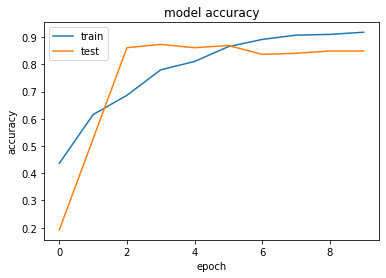

In [96]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

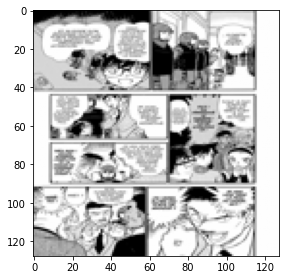

Actual :-  ['bc', 'shingeki', 'conan', 'naruto']
Predicted :-  conan


In [103]:
ex = 900
predict = model.predict(np.array(x_train[ex:ex + 1]))
image = x_train[ex:ex + 1]
plt.imshow(image[0]/255,cmap='gray')
plt.tight_layout()
plt.show()

output = { 0:'black-clover',1:'aot',2:'conan',3:'naruto'}

print("Actual :- ",labels)
print("Predicted :- ",output[np.argmax(predict)])

Matrice de confusion

In [188]:
predictions = model.predict(np.array(x_test))
matrice_conf = np.zeros((4,4))
for i in range (y_test.size):
  matrice_conf[int(y_test[i])][np.argmax(predictions[i-1])] += 1
print(matrice_conf)

[[51.  2.  2.  8.]
 [ 1. 61.  1.  0.]
 [ 0.  1. 62.  0.]
 [ 6.  1.  1. 56.]]


Accuracy par classe (calculée à partir de la matrice de confusion)

In [189]:
acc = []
for i in range(4):
  acc.append(matrice_conf[i][i]/sum(matrice_conf[i]))
acc

[0.8095238095238095, 0.9682539682539683, 0.9841269841269841, 0.875]